## CalEnviroScreen
Looking again at CalEnviroscreen, this time through the CSV rather than the shapefile data.

# Setting up the data

Started by importing pandas and geopandas.

In [1]:
import pandas as pd
import geopandas as gpd

I then ask pandas to read the file and converted a few of the location variables to strings in order to allow for some of the sorting and to zfill the information.

In [2]:
df = pd.read_csv('Data/Calenviroscreen4.csv',
    dtype=
    {
        'Census Tract':str,
        'California County':str,
        'Approximate Location': str
    }
)
df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


Above, we see that the leading zero is missing from the data, so I zfilled the information. 

In [3]:
df['Census Tract'] = df['Census Tract'].str.zfill(11)

In [4]:
# look at the data types, verbose = True shows us all the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [5]:
columns_to_keep = ['Census Tract',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Pctl',
                   'Pop. Char. Pctl',
                   'PM2.5 Pctl',
                   'Drinking Water Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Asthma Pctl',
                   'Cardiovascular Disease Pctl']
df2 = df[columns_to_keep]
df2.info

<bound method DataFrame.info of      Census Tract  Total Population California County  \
0     06019001100              2780           Fresno    
1     06077000700              4680       San Joaquin   
2     06037204920              2751       Los Angeles   
3     06019000700              3664           Fresno    
4     06019000200              2689           Fresno    
...           ...               ...               ...   
8030  06107004000               582           Tulare    
8031  06109985202              2509         Tuolumne    
8032  06111001206               778          Ventura    
8033  06111003012               675          Ventura    
8034  06111980000               118          Ventura    

                     Approximate Location  CES 4.0 Score  \
0                                  Fresno          93.18   
1                                Stockton          86.65   
2                             Los Angeles          82.39   
3                                  Fresno  

Next, I narrow this information to the county of Los Angeles.

In [6]:
df2LA = df2[df2['California County'] == 'Los Angeles']

In [15]:
df2LA.rename(columns = {'Census Tract':'FIPS'}, inplace = True) 

/tmp/ipykernel_1907/1790350419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2LA.rename(columns = {'Census Tract':'FIPS'}, inplace = True)


In [16]:
df2LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2 to 7990
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIPS                         2343 non-null   object 
 1   Total Population             2343 non-null   int64  
 2   California County            2343 non-null   object 
 3   Approximate Location         2343 non-null   object 
 4   CES 4.0 Score                2297 non-null   float64
 5   CES 4.0 Percentile Range     2297 non-null   object 
 6   Pollution Burden Pctl        2343 non-null   float64
 7   Pop. Char. Pctl              2297 non-null   float64
 8   PM2.5 Pctl                   2343 non-null   float64
 9   Drinking Water Pctl          2326 non-null   float64
 10  Tox. Release Pctl            2343 non-null   float64
 11  Cleanup Sites Pctl           2343 non-null   float64
 12  Asthma Pctl                  2334 non-null   float64
 13  Cardiovascular Disease 

In [9]:
tracts = gpd.read_file('Data/2020_Census_Tracts.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [10]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [11]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
 6   FIPS           2496 non-null   object  
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 136.6+ KB


In [17]:
CEStracts=tracts.merge(df2LA,on='FIPS')

After this, I also confirm that the projection of the geodataframe is mercator in order to allow us to join our calenviroscreen information with information about oil wells in the county.

In [18]:
CEStracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Oil Wells Data

In [19]:
dfoil = pd.read_csv('Data/Oil_Wells.csv')

In [20]:
df_act = dfoil.drop(dfoil[dfoil['WellStatus'] != 'A'].index)

In [21]:
gdf_act = gpd.GeoDataFrame(df_act, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df_act.Longitude, df_act.Latitude))

One approach here is to join the two together as we did on the previous assignment

In [22]:
# Perform a spatial join based on geographic coordinates
gdfoilCES = gpd.sjoin(gdf_act, CEStracts, how='right', op='within')
gdfoilCES.head()

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,index_left,X,Y,OBJECTID_left,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,...,CES 4.0 Score,CES 4.0 Percentile Range,Pollution Burden Pctl,Pop. Char. Pctl,PM2.5 Pctl,Drinking Water Pctl,Tox. Release Pctl,Cleanup Sites Pctl,Asthma Pctl,Cardiovascular Disease Pctl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.81,45-50%,29.07,55.69,57.90,83.13,59.51,0.0,26.53,75.46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.17,20-25%,19.50,25.44,55.61,77.57,59.19,0.0,19.65,55.53
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.64,55-60%,36.65,71.48,57.51,83.13,60.07,0.0,26.53,75.46
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.86,35-40%,55.73,27.61,55.00,83.13,61.00,0.0,13.06,45.13
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.07,50-55%,61.32,44.11,56.14,75.32,61.39,0.0,15.28,38.66


In [23]:
gdfoilCES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4664 entries, 0 to 2017
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   2750 non-null   float64 
 1   X                            2750 non-null   float64 
 2   Y                            2750 non-null   float64 
 3   OBJECTID_left                2750 non-null   float64 
 4   DistrictNu                   2750 non-null   object  
 5   APINumber                    2750 non-null   float64 
 6   BLMWell                      2750 non-null   object  
 7   DryHole                      2750 non-null   object  
 8   WellStatus                   2750 non-null   object  
 9   OperatorNa                   2750 non-null   object  
 10  CountyName                   2750 non-null   object  
 11  FieldName                    2750 non-null   object  
 12  AreaName                     2750 non-null   object  
 13  

There are some null responses in joining the datasets that we should keep in mind. It will also probably make sense to cut down on the amount of columns here as well, but for right now, I'm going to test out mapping the data.

# Mapping and visuals

Now to think about visualizations, chart and map options.

In [24]:
import plotly.express as px

In [25]:
import matplotlib.pyplot as plt
import contextily as ctx

First, here's a static map of calenviroscreen, checked with the initial data and oil wells to make sure it's working

<Axes: >

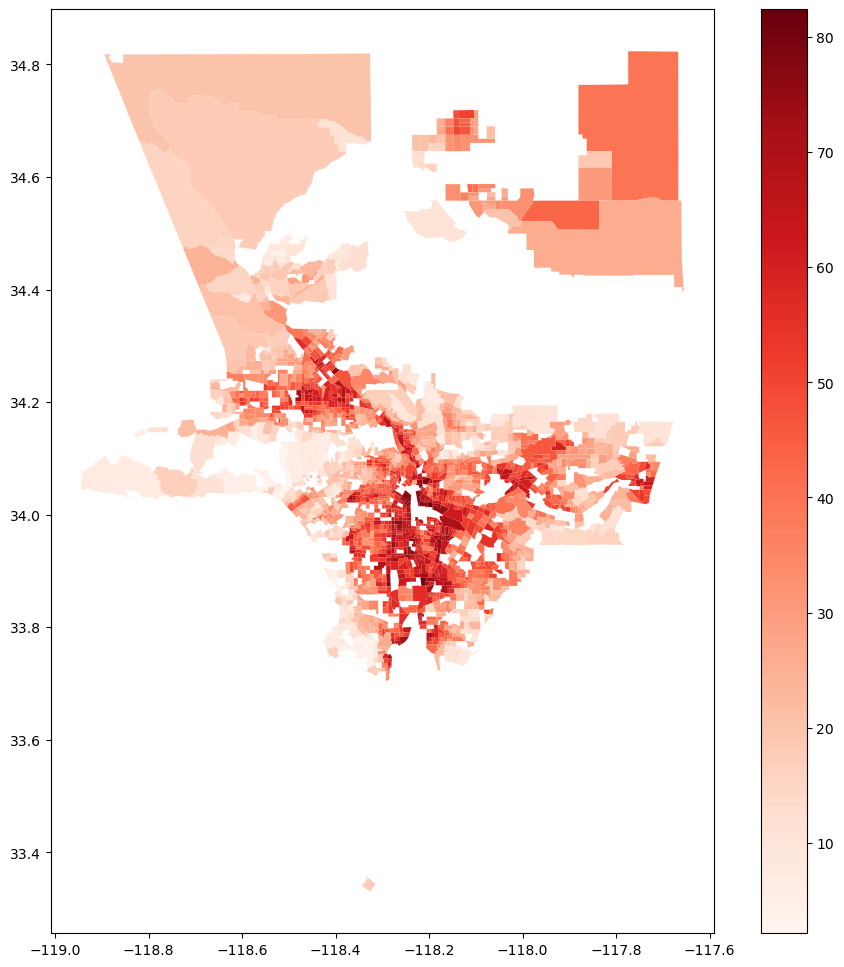

In [26]:
fig,ax = plt.subplots(figsize=(12,12))

CEStracts.plot(ax=ax,column='CES 4.0 Score',legend=True,cmap='Reds')

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))

gdfoilCES.plot(ax=ax,column='CES 4.0 Score',legend=True,cmap='Reds')

# Spatial Autocorrelation

In [27]:
#I'd like to add a column that looks at oil wells by the tract and adds a new column
oilwellsbytract = gdfoilCES.FIPS.value_counts().rename_axis('FIPS').reset_index(name='oilwell_count')

In [28]:
oilwellsbytract

,FIPS,oilwell_count
0,06037980033,278
1,06037294701,194
2,06037980014,150
3,06037920031,147
4,06037703100,140
...,...,...
2013,06037232500,1
2014,06037232300,1
2015,06037232200,1
2016,06037232120,1


In [29]:
oilwellsbytract = gdfoilCES.FIPS.value_counts().rename_axis('FIPS').reset_index(name='oilwell_count')

In [30]:
gdfoilCES.sample(10)

,index_left,X,Y,OBJECTID_left,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,...,CES 4.0 Percentile Range,Pollution Burden Pctl,Pop. Char. Pctl,PM2.5 Pctl,Drinking Water Pctl,Tox. Release Pctl,Cleanup Sites Pctl,Asthma Pctl,Cardiovascular Disease Pctl,oilwell_count
1228,8588.0,-118.256898,33.780691,8589.0,Southern,3726910.0,N,N,A,"Warren E&P, Inc.",...,95-100% (highest scores),97.98,93.99,67.45,42.43,97.24,95.24,83.00,92.82,194
3238,8725.0,-118.359946,33.991330,8726.0,Southern,3726686.0,N,N,A,Sentinel Peak Resources California LLC,...,55-60%,47.78,60.31,72.27,72.24,83.63,9.59,97.30,68.62,140
2803,122.0,-118.162633,33.795497,123.0,Southern,3710958.0,N,N,A,"Signal Hill Petroleum, Inc.",...,55-60%,76.25,40.00,64.11,25.73,99.41,78.63,51.13,64.12,110
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90-95%,76.73,92.74,91.40,83.13,53.78,62.45,80.26,85.97,1
4594,928.0,-118.206605,33.779525,929.0,Southern,3727429.0,N,N,A,"California Resources Long Beach, Inc.",...,NaN,98.43,NaN,69.50,34.73,96.46,97.72,40.49,19.52,278
2882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15-20%,41.99,12.23,62.97,53.22,92.65,43.24,24.56,47.88,1
1886,7006.0,-117.953782,33.967159,7007.0,Southern,3714720.0,N,N,A,Matrix Oil Corporation,...,20-25%,27.79,23.92,71.64,10.43,82.63,0.00,52.59,66.33,36
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65-70%,98.29,35.38,76.65,59.71,72.97,92.44,50.19,29.89,1
3001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80-85%,58.82,92.13,76.02,30.71,95.56,46.08,83.85,86.75,1
3822,2212.0,-118.549660,34.317231,2213.0,Coastal,3721806.0,N,N,A,Southern California Gas Company,...,30-35%,62.64,22.00,48.35,65.99,18.75,46.08,28.25,29.30,118


Next I normalized oil wells based on population, in this case 1000 people

In [31]:
gdfoilCES['oilwell_per_1000'] = gdfoilCES['oilwell_count']/gdfoilCES['Total Population']*1000

In [45]:
gdfoilCES.sample(5)

,index_left,X,Y,OBJECTID_left,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,...,Pop. Char. Pctl,PM2.5 Pctl,Drinking Water Pctl,Tox. Release Pctl,Cleanup Sites Pctl,Asthma Pctl,Cardiovascular Disease Pctl,oilwell_count,oilwell_per_1000,oilwells_1000_lag
1761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.12,57.96,71.52,64.79,79.69,6.78,8.66,1,0.233809,0.285193
2014,13492.0,-118.067387,33.944472,13493.0,Southern,3714764.0,N,N,A,BreitBurn Operating LP,...,62.07,82.18,86.91,85.27,99.70,62.97,88.71,111,16.042781,16.042781
4323,2356.0,-118.425035,33.916752,2357.0,Southern,3707203.0,N,N,A,"Cooper & Brain, Inc.",...,NaN,76.74,NaN,86.46,72.42,15.49,28.83,2,inf,inf
3161,1870.0,-118.378015,34.012476,1871.0,Southern,3723170.0,N,N,A,Sentinel Peak Resources California LLC,...,28.76,66.40,60.96,80.63,51.74,42.01,39.81,35,9.315944,9.315944
4057,7494.0,-118.181544,33.760054,7495.0,Southern,3720524.0,N,N,A,THUMS Long Beach Co.,...,61.06,67.59,34.73,97.34,44.77,85.39,69.44,89,17.201392,17.201392


In [51]:
gdfstats = gdfoilCES.dropna(thresh=5)

In [52]:
gdfstats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   2750 non-null   float64 
 1   X                            2750 non-null   float64 
 2   Y                            2750 non-null   float64 
 3   OBJECTID_left                2750 non-null   float64 
 4   DistrictNu                   2750 non-null   object  
 5   APINumber                    2750 non-null   float64 
 6   BLMWell                      2750 non-null   object  
 7   DryHole                      2750 non-null   object  
 8   WellStatus                   2750 non-null   object  
 9   OperatorNa                   2750 non-null   object  
 10  CountyName                   2750 non-null   object  
 11  FieldName                    2750 non-null   object  
 12  AreaName                     2750 non-null   object  


In [53]:
# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

In [54]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(gdfoilCES,k=8)

# Row-standardization
wq.transform = 'r'

/opt/conda/lib/python3.11/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)


In [55]:
# create a new column for the spatial lag
gdfoilCES['oilwells_1000_lag'] = lps.weights.lag_spatial(wq, gdfoilCES['oilwell_per_1000'])

/opt/conda/lib/python3.11/site-packages/mapclassify/classifiers.py:939: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.11/site-packages/mapclassify/classifiers.py:969: RuntimeWarning: invalid value encountered in scalar divide
  gadf = 1 if adam == 0 else 1 - self.adcm / adam
/opt/conda/lib/python3.11/site-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


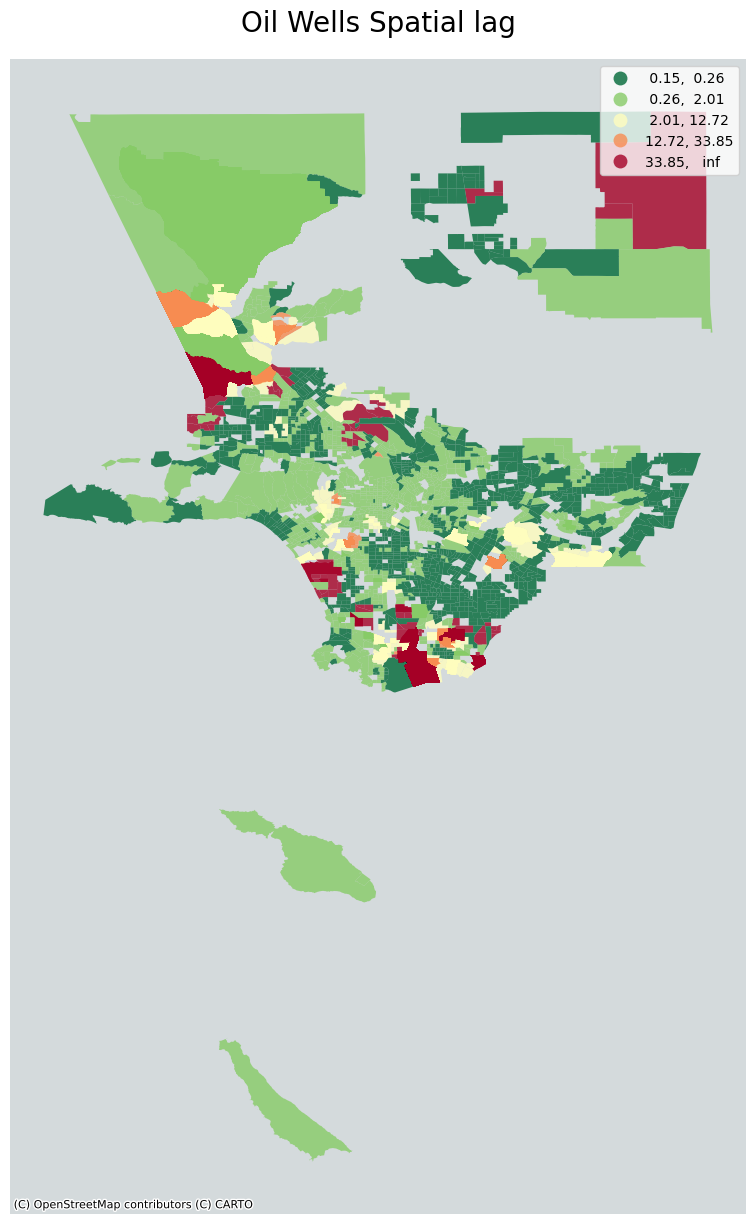

In [40]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# spatial lag choropleth
gdfoilCES.plot(ax=ax,
         figsize=(15,15),
         column='oilwells_1000_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles')

ax.axis('off')
ax.set_title('Oil Wells Spatial lag',fontsize=20,pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [56]:
y = gdfoilCES.oilwell_per_1000
moran = Moran(y, wq)
moran.I

/opt/conda/lib/python3.11/site-packages/esda/moran.py:207: RuntimeWarning: invalid value encountered in subtract
  z = y - y.mean()
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


nan

I am not quite sure how to make this useful and compare some of our values. It looks like this might be largely based on location, which would make the use of CES less relevat as it is more limited than just location would be. I find it somewhat unlikely that there wouldn't be a spatial correlation in clusters oil wells based on the visual, but maybe not. 

Important that I also am using all types of oil wells and we had initially looked at active. I may also want to look at this or more actual statistical relationship analysis: https://github.com/pysal/spreg/issues/47

Exception: one or more input arrays have missing/NaN values

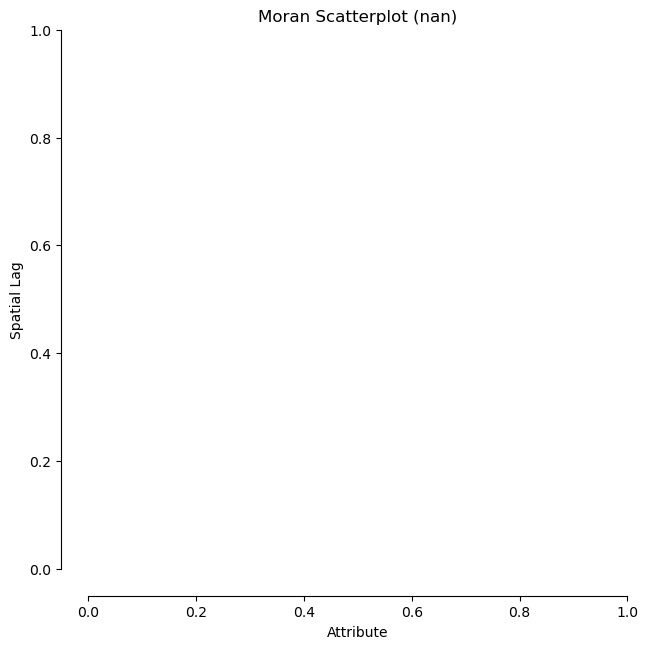

In [43]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()